<a href="https://colab.research.google.com/github/Felipepa9/MADSI/blob/main/Seccion_2_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

IMPORTACIÓN DEL DATASET

In [3]:
data = pd.read_csv('/content/drive/MyDrive/MOD. Y SIST. INTELIGENTES/Seccion_2.csv')
data.head()

,origin_leg_airport_iata_code,destination_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
0,BOG,MIA,A320,480,6679,463,3
1,BOG,MIA,A320,384,6707,618,3
2,BOG,MIA,A320,288,6922,938,3
3,BOG,MIA,A320,480,7456,1079,3
4,BOG,MIA,A320,480,7604,549,3


PREPARACIÓN DE LOS DATOS

In [4]:
data.describe()

,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
count,6141.000000,6141.000000,6141.000000,6141.000000
mean,594.869728,24883.396027,1199.942843,2.140205
std,168.563712,13183.490634,1246.855397,0.509883
min,200.000000,6679.000000,0.000000,1.000000
25%,475.000000,15373.000000,0.000000,2.000000
50%,560.000000,16923.000000,1045.000000,2.000000
75%,800.000000,41491.000000,1831.000000,2.000000
max,1200.000000,58901.000000,28994.000000,3.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6141 entries, 0 to 6140
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   origin_leg_airport_iata_code       6141 non-null   object
 1   destination_leg_airport_iata_code  6141 non-null   object
 2   business_type                      6141 non-null   object
 3   taxi_fuel_kg_qty                   6141 non-null   int64 
 4   trip_fuel_kg_qty                   6141 non-null   int64 
 5   extra_fuel_kg_qty                  6141 non-null   int64 
 6   fuel_profitability                 6141 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 336.0+ KB


In [6]:
data.loc[data['origin_leg_airport_iata_code'] == 'BOG', 'origin_leg_airport_iata_code'] = 1
data.loc[data['origin_leg_airport_iata_code'] == 'LIM', 'origin_leg_airport_iata_code'] = 2
data.loc[data['origin_leg_airport_iata_code'] == 'SCL', 'origin_leg_airport_iata_code'] = 3

data['origin_leg_airport_iata_code'] = pd.to_numeric(data['origin_leg_airport_iata_code'], errors='coerce').astype('Int64')

data.head()

,origin_leg_airport_iata_code,destination_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
0,1,MIA,A320,480,6679,463,3
1,1,MIA,A320,384,6707,618,3
2,1,MIA,A320,288,6922,938,3
3,1,MIA,A320,480,7456,1079,3
4,1,MIA,A320,480,7604,549,3


In [7]:
data = data.drop('destination_leg_airport_iata_code', axis=1)
data.head()

,origin_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
0,1,A320,480,6679,463,3
1,1,A320,384,6707,618,3
2,1,A320,288,6922,938,3
3,1,A320,480,7456,1079,3
4,1,A320,480,7604,549,3


In [8]:
data['business_type'] = data['business_type'].astype(str).str.replace('A', '', regex=False).str.replace('B', '', regex=False)
data['business_type'] = pd.to_numeric(data['business_type'], errors='coerce').astype('Int64')

data.head()

,origin_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
0,1,320,480,6679,463,3
1,1,320,384,6707,618,3
2,1,320,288,6922,938,3
3,1,320,480,7456,1079,3
4,1,320,480,7604,549,3


RECONOCIMIENTO DEL DATASET



In [9]:
data.describe()

,origin_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
count,6141.0,6141.0,6141.000000,6141.000000,6141.000000,6141.000000
mean,1.784237,699.587852,594.869728,24883.396027,1199.942843,2.140205
std,0.863776,160.826931,168.563712,13183.490634,1246.855397,0.509883
min,1.0,320.0,200.000000,6679.000000,0.000000,1.000000
25%,1.0,763.0,475.000000,15373.000000,0.000000,2.000000
50%,1.0,763.0,560.000000,16923.000000,1045.000000,2.000000
75%,3.0,763.0,800.000000,41491.000000,1831.000000,2.000000
max,3.0,789.0,1200.000000,58901.000000,28994.000000,3.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6141 entries, 0 to 6140
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   origin_leg_airport_iata_code  6141 non-null   Int64
 1   business_type                 6141 non-null   Int64
 2   taxi_fuel_kg_qty              6141 non-null   int64
 3   trip_fuel_kg_qty              6141 non-null   int64
 4   extra_fuel_kg_qty             6141 non-null   int64
 5   fuel_profitability            6141 non-null   int64
dtypes: Int64(2), int64(4)
memory usage: 300.0 KB


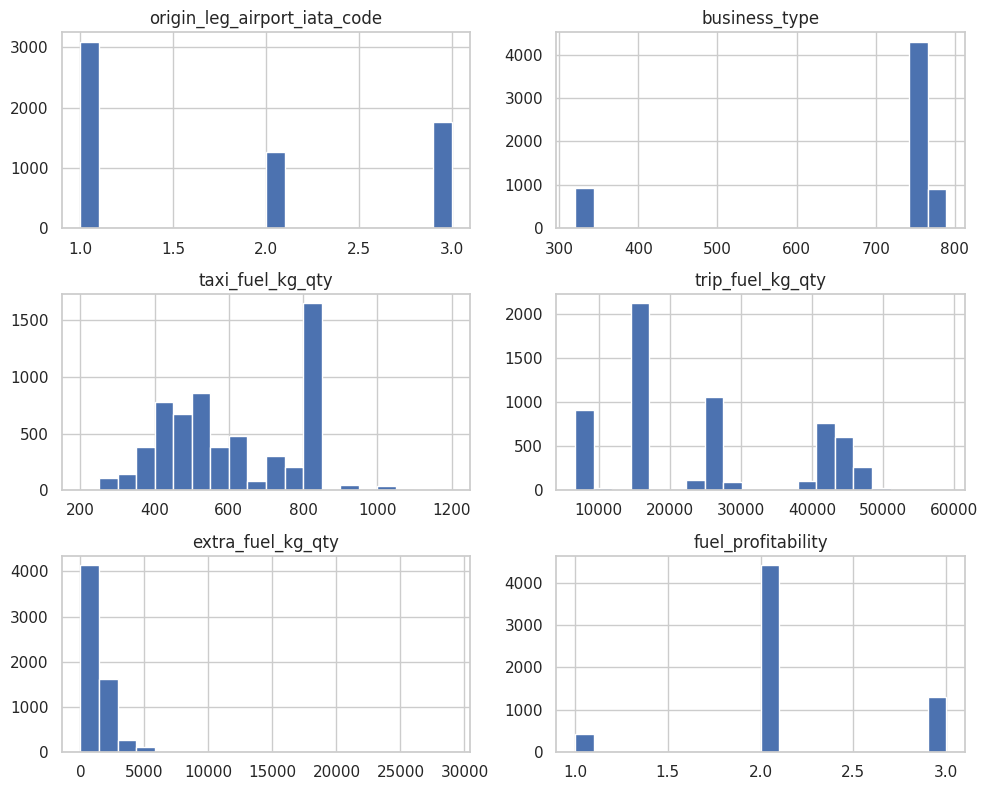

In [11]:
data.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

FORMULACIÓN DEL MODELO

In [12]:
feature_names = data.columns[:5].tolist()
feature_names

['origin_leg_airport_iata_code',
 'business_type',
 'taxi_fuel_kg_qty',
 'trip_fuel_kg_qty',
 'extra_fuel_kg_qty']

In [13]:
data['TIPO_RENTAB'] = data['fuel_profitability'].map({
        1: 'baja',
        2: 'media',
        3: 'alta'
    })

data.head()

,origin_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability,TIPO_RENTAB
0,1,320,480,6679,463,3,alta
1,1,320,384,6707,618,3,alta
2,1,320,288,6922,938,3,alta
3,1,320,480,7456,1079,3,alta
4,1,320,480,7604,549,3,alta


In [14]:
    X = data[feature_names]
    y = data['fuel_profitability']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

    print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras.")
    print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras.")
    print(f"\nDimensiones: X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

Tamaño del conjunto de entrenamiento: 4912 muestras.
Tamaño del conjunto de prueba: 1229 muestras.

Dimensiones: X_train: (4912, 5), y_train: (4912,), X_test: (1229, 5), y_test: (1229,)


In [15]:
    num_features = X_train.shape[1]

    num_classes = len(y_train.unique())

    y_train_encoded = to_categorical(y_train - 1, num_classes=num_classes)
    y_test_encoded = to_categorical(y_test - 1, num_classes=num_classes)

    l2_lambda=0.001
    dropout_rate=0.3

    model = Sequential([
        Dense(64, activation='relu', input_shape=(num_features,), kernel_regularizer=regularizers.l2(l2_lambda)),

        Dropout(dropout_rate),
        Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)),

        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    print("\nResumen del modelo:")
    model.summary()


Resumen del modelo:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,563 (10.01 KB)

 Trainable params: 2,563 (10.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5361 - loss: 1642.6193 - val_accuracy: 0.7253 - val_loss: 88.2375
Epoch 2/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5382 - loss: 250.6227 - val_accuracy: 0.1953 - val_loss: 7.8301
Epoch 3/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5632 - loss: 47.8493 - val_accuracy: 0.7253 - val_loss: 0.8051
Epoch 4/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6463 - loss: 10.0348 - val_accuracy: 0.7253 - val_loss: 0.8245
Epoch 5/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6832 - loss: 6.4536 - val_accuracy: 0.7253 - val_loss: 0.8261
Epoch 6/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6932 - loss: 6.4882 - val_accuracy: 0.7253 - val_loss: 0.8260
Epoch 7/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7087 - loss: 2.5035 - val_accuracy: 0.7253 - val_loss: 0.8226
Epoch 8/200
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7096 - loss: 2.2590 - 

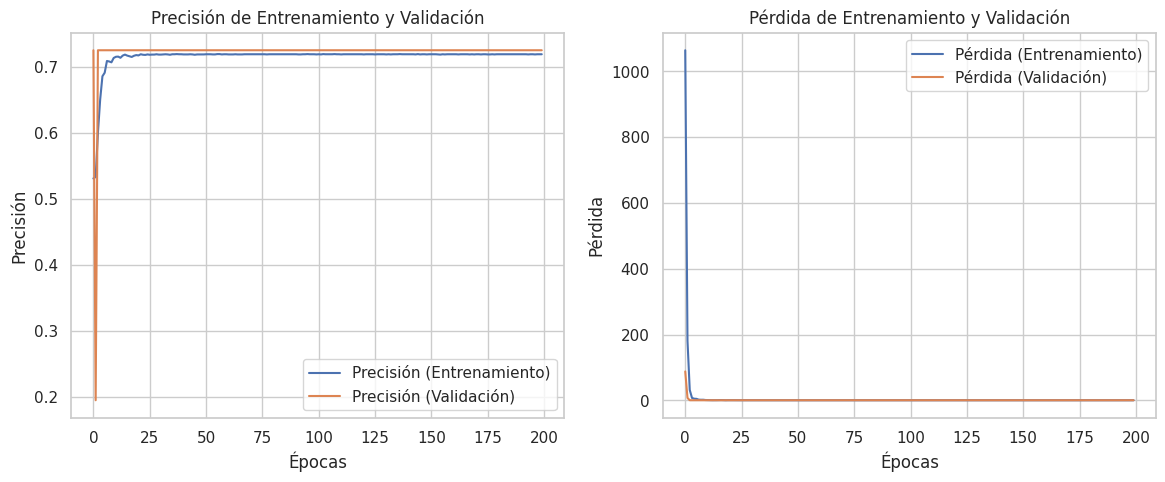

In [16]:
    history = model.fit(X_train.astype(np.float32), y_train_encoded, epochs=200, batch_size=32, validation_split=0.2)

    test_loss, test_accuracy = model.evaluate(X_test.astype(np.float32), y_test_encoded)
    print(f"\nPrecisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")
    print(f"Pérdida en el conjunto de prueba: {test_loss}")
    print(f"Número de clases: {num_classes}")

    acc = history.history.get('accuracy')
    val_acc = history.history.get('val_accuracy')
    loss = history.history.get('loss')
    val_loss = history.history.get('val_loss')
    epochs_range = range(len(acc if acc else val_acc if val_acc else loss if loss else val_loss)) # Manejar si alguna métrica no está

    plt.figure(figsize=(14, 5))

    if acc and val_acc:
        plt.subplot(1, 2, 1)
        plt.plot(epochs_range, acc, label='Precisión (Entrenamiento)')
        plt.plot(epochs_range, val_acc, label='Precisión (Validación)')
        plt.legend(loc='lower right')
        plt.title('Precisión de Entrenamiento y Validación')
        plt.xlabel('Épocas')
        plt.ylabel('Precisión')

    if loss and val_loss:
        plt.subplot(1, 2, 2)
        plt.plot(epochs_range, loss, label='Pérdida (Entrenamiento)')
        plt.plot(epochs_range, val_loss, label='Pérdida (Validación)')
        plt.legend(loc='upper right')
        plt.title('Pérdida de Entrenamiento y Validación')
        plt.xlabel('Épocas')
        plt.ylabel('Pérdida')

    if not (acc and val_acc and loss and val_loss): # Si faltan métricas para ambos gráficos
        if acc and val_acc: # Solo hay precisión
             plt.title('Precisión de Entrenamiento y Validación')
             plt.xlabel('Épocas'); plt.ylabel('Precisión')
        elif loss and val_loss: # Solo hay pérdida
            plt.title('Pérdida de Entrenamiento y Validación')
            plt.xlabel('Épocas'); plt.ylabel('Pérdida')

    plt.show()

Pérdida en el conjunto de prueba: 0.7543
Precisión en el conjunto de prueba: 0.7201
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Reporte de Clasificación:
              precision    recall  f1-score   support

        baja       0.00      0.00      0.00        86
       media       0.72      1.00      0.84       885
        alta       0.00      0.00      0.00       258

    accuracy                           0.72      1229
   macro avg       0.24      0.33      0.28      1229
weighted avg       0.52      0.72      0.60      1229



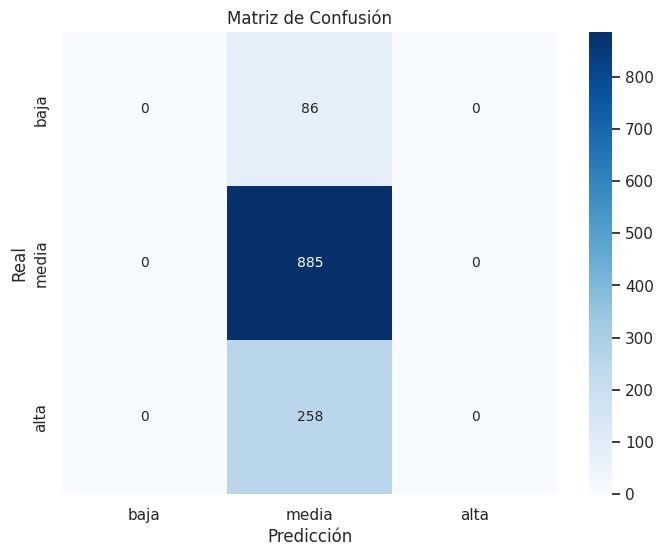

In [17]:
# Define target_names
target_names = ['baja', 'media', 'alta']

# Convert X_test to a NumPy array with a compatible dtype
X_test_np = X_test.astype(np.float32)

# Use the converted X_test_np for evaluation and prediction
loss, accuracy = model.evaluate(X_test_np, y_test_encoded, verbose=0)
print(f"Pérdida en el conjunto de prueba: {loss:.4f}")
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")

# Predicciones
y_pred_proba = model.predict(X_test_np)
y_pred_classes = np.argmax(y_pred_proba, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1) # Use y_test_encoded here as well

# Reporte de Clasificación
print("\nReporte de Clasificación:")
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names, zero_division=0))

# Matriz de Confusión
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()

In [18]:
# prompt: Ejecuta el F1 score

from sklearn.metrics import f1_score

# Calculate F1 score
f1_macro = f1_score(y_true_classes, y_pred_classes, average='macro')
f1_weighted = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"\nMacro F1 Score: {f1_macro:.4f}")
print(f"Weighted F1 Score: {f1_weighted:.4f}")



Macro F1 Score: 0.2791
Weighted F1 Score: 0.6029


In [ ]:
# prompt: El resultado de f1 score es bueno o malo

# Para determinar si un resultado de F1 score es "bueno" o "malo", necesitas considerarlo en el contexto de tu problema específico y los objetivos que buscas. No hay un umbral universal.

# **Generalmente:**

# *   **F1 Score cercano a 1.0:** Indica un excelente equilibrio entre precisión y recall, lo que significa que el modelo identifica correctamente la mayoría de los casos positivos y no genera muchos falsos positivos. Esto generalmente se considera un buen resultado.
# *   **F1 Score cercano a 0.0:** Indica que el modelo tiene un rendimiento muy pobre, ya sea porque no logra identificar los casos positivos (bajo recall) o porque genera demasiados falsos positivos (baja precisión), o ambos. Esto generalmente se considera un mal resultado.

# **Consideraciones clave para evaluar tu F1 score:**

# 1.  **Clases Desbalanceadas:** Si tienes clases muy desbalanceadas (por ejemplo, una clase que ocurre mucho menos que las otras), la precisión o el accuracy por sí solos pueden ser engañosos. El F1 score es particularmente útil en estos casos porque penaliza los errores tanto en la identificación de la clase minoritaria como en la clase mayoritaria. Un F1 score alto en clases desbalanceadas es un buen indicador de rendimiento.
# 2.  **Importancia de Falsos Positivos vs. Falsos Negativos:** Dependiendo de tu aplicación, un falso positivo puede ser más costoso que un falso negativo, o viceversa. El F1 score es el promedio armónico de precisión y recall, dando igual peso a ambos. Si uno es significativamente más importante que el otro, podrías necesitar evaluar otras métricas como solo precisión o solo recall, o métricas que ajusten el peso entre ellos.
# 3.  **Benchmark o Línea Base:** ¿Cuál es el rendimiento de un modelo simple o de referencia (por ejemplo, un modelo aleatorio o un modelo que siempre predice la clase más frecuente)? Tu F1 score debe ser significativamente mejor que este benchmark para considerarse bueno.
# 4.  **Resultados de Otros Modelos:** Si has probado varios modelos, compara sus F1 scores. Un modelo con un F1 score más alto suele ser preferible.
# 5.  **Complejidad del Problema:** Algunos problemas son intrínsecamente más difíciles que otros. Un F1 score que sería considerado bajo para un problema simple podría ser excelente para un problema muy complejo.

# **Interpretando tus resultados:**

# Observando tu reporte de clasificación y los F1 scores (Macro y Weighted), puedes evaluar el rendimiento:

# *   **F1 Score por Clase:** Mira el F1 score para cada clase individual en el reporte de clasificación. Si algunas clases tienen F1 scores significativamente más bajos que otras, esto indica que el modelo tiene dificultades particulares con esas clases.
# *   **Macro vs. Weighted F1 Score:**
#     *   **Macro F1 Score:** Calcula el F1 score para cada clase de forma independiente y luego toma el promedio sin tener en cuenta el tamaño de cada clase. Es útil cuando deseas dar igual importancia a todas las clases, independientemente de cuántas muestras tengan.
#     *   **Weighted F1 Score:** Calcula el F1 score para cada clase y luego toma el promedio ponderado por el número de muestras en cada clase. Es más útil cuando deseas que el rendimiento en las clases con más muestras tenga un mayor impacto en la métrica general.

# **En resumen:**

# Sin conocer el contexto específico de tu problema (qué representan las clases, cuáles son las consecuencias de los errores, etc.), es difícil dar una respuesta definitiva de "bueno" o "malo". Sin embargo, **un F1 score más alto es siempre mejor que uno más bajo**.

# Analiza los valores específicos de Macro y Weighted F1 score que obtuviste y compáralos con las consideraciones mencionadas anteriormente para hacer una evaluación informada. Si tus F1 scores son significativamente mayores que un benchmark simple y son aceptables para el propósito de tu aplicación, entonces puedes considerarlos "buenos". Si son bajos o indican problemas específicos con ciertas clases, podrías necesitar mejorar tu modelo.

print("\nPara determinar si el resultado de F1 score es bueno o malo, debes considerar el contexto de tu problema:")
print("- **Observa los valores obtenidos de Macro F1 Score y Weighted F1 Score.**")
print(f"- **Macro F1 Score: {f1_macro:.4f}**")
print(f"- **Weighted F1 Score: {f1_weighted:.4f}**")
print("- **Revisa el F1 Score para cada clase en el Reporte de Clasificación.**")
print("- **Considera si tienes clases desbalanceadas.**")
print("- **Compara estos resultados con un benchmark (por ejemplo, un modelo simple) o resultados de otros modelos que hayas probado.**")
print("- **Evalúa si el rendimiento es aceptable para el objetivo específico de tu aplicación.**")
print("\nEn general:")
print("- Un F1 score más cercano a 1.0 es mejor.")
print("- Un F1 score más cercano a 0.0 es peor.")
print("\nUn F1 score se considera 'bueno' si es significativamente mejor que un rendimiento aleatorio y cumple con los requisitos de tu problema.")